# Analysis of US YouTube Data

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import json 
import requests
from pprint import pprint 

In [ ]:
file=pd.read_csv("Resources/USvideos.csv")
canada=pd.read_csv("Resources/CAvideos.csv")


# DataFrame of US YouTube Data

In [4]:
file.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# JSON of US YouTube Data

In [ ]:
with open('Resources/US_category_id.json') as file:
    data = json.load(file)
pprint(data)

# Assign ID to Category

In [ ]:
id_to_category = {}

for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        
id_to_category

# Sum of Data by Category ID

In [ ]:
groupby_category=file.groupby("category_id")
category=groupby_category.sum()
category

In [ ]:
#category.set_index([list(id_to_category.values()), 'category'])
category_list=list(id_to_category.values())

# Add Category Column to DataFrame

In [ ]:
category_add_column=pd.DataFrame({'category':category_list})
category_add_column
category['category']=category_add_column['category']
category

In [ ]:
index = category.index

# Mean of Category ID

In [10]:
US_groupby_category = file.groupby("category_id")
US_category = US_groupby_category.mean()
US_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544
2,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000
10,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000
15,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000
17,2.025969e+06,45363.942502,2361.339006,5148.185373,0.012879,0.007820,0.000920
19,8.546196e+05,12030.462687,846.833333,2267.440299,0.000000,0.000000,0.000000
20,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000
22,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000
23,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000


In [11]:
category_list=list(id_to_category.values())

In [12]:
US_category_add_column=pd.DataFrame({'category':category_list})
US_category['category']=US_category_add_column['category']
US_category.fillna('N/A')
US_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544,Autos & Vehicles
2,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000,Music
10,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000,Comedy
15,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000,Science & Technology
17,2.025969e+06,45363.942502,2361.339006,5148.185373,0.012879,0.007820,0.000920,Movies
19,8.546196e+05,12030.462687,846.833333,2267.440299,0.000000,0.000000,0.000000,Action/Adventure
20,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,Classics
22,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,Documentary
23,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,Drama


# Drop Last Row of DataFrame

In [13]:
US_category.drop(US_category.tail(1).index,inplace=True)
US_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544,Autos & Vehicles
2,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000,Music
10,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000,Comedy
15,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000,Science & Technology
17,2.025969e+06,45363.942502,2361.339006,5148.185373,0.012879,0.007820,0.000920,Movies
19,8.546196e+05,12030.462687,846.833333,2267.440299,0.000000,0.000000,0.000000,Action/Adventure
20,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,Classics
22,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,Documentary
23,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,Drama


# Bar Chart of US YouTube Views Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

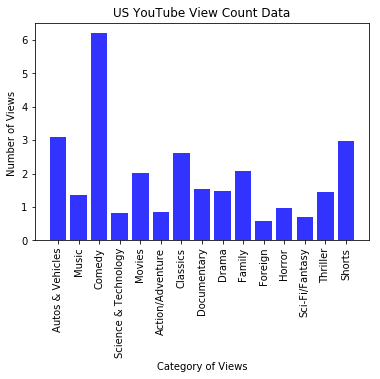

In [14]:
#x_axis[]
x_axis = US_category['category']
y_axis = US_category['views']

plt.title("US YouTube View Count Data")
plt.xlabel("Category of Views")
plt.ylabel("Number of Views ")

plt.bar(x_axis, y_axis/1000000, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)
#plt.ylim(1000000, 600000000)

# Bar Chart of US YouTube Comments Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

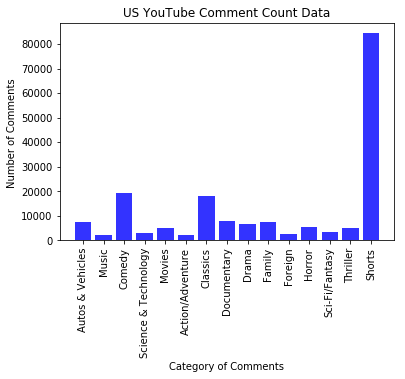

In [15]:
x_axis = US_category['category']
y_axis = US_category['comment_count']

plt.title("US YouTube Comment Count Data")
plt.xlabel("Category of Comments")
plt.ylabel("Number of Comments ")

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)

# Bar Chart of US YouTube Likes Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

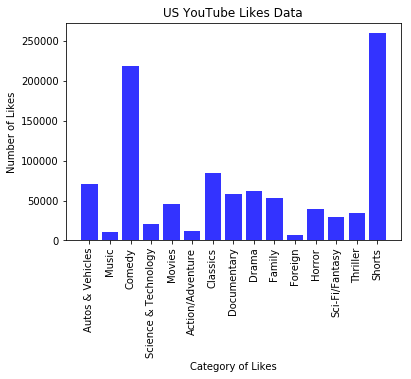

In [16]:
x_axis = US_category['category']
y_axis = US_category['likes']

plt.title("US YouTube Likes Data")
plt.xlabel("Category of Likes")
plt.ylabel("Number of Likes")

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)

# Bar Chart of US YouTube Dislikes Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

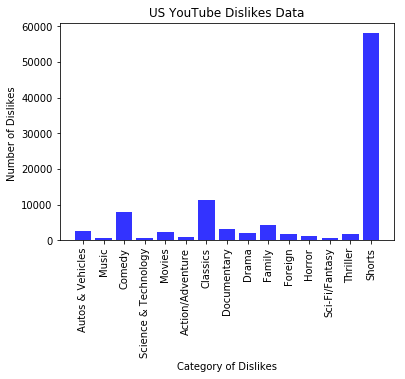

In [17]:
x_axis = US_category['category']
y_axis = US_category['dislikes']

plt.title("US YouTube Dislikes Data")
plt.xlabel("Category of Dislikes")
plt.ylabel("Number of Dislikes ")

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)